# <span style="color:gold">Question 2 item A:</span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Calculating the probability that the majority vote is correct using Bayes' law

In [2]:

def probability(num0, num1, accuracy):
    one_correctness = (accuracy ** num1) * ((1 - accuracy) ** num0)
    zero_correctness = (accuracy ** num0) * ((1 - accuracy) ** num1)
    correctness_one_scenario = one_correctness / (one_correctness + zero_correctness)
    return correctness_one_scenario

# <span style="color:gold"> Question 2 item B:</span>

## <span style="color:red"> correct_choise in function</span>
* Using the random selection function, the number of zeros and ones are selected with probability pi and zeroes with probability one minus pi.
Finally, we output the number of ones that the random function gave with probability after the correct_choise function
We simulate 10,000 times for each relevant pi and add the average accuracies to the list of accuracies and place them in the graph.

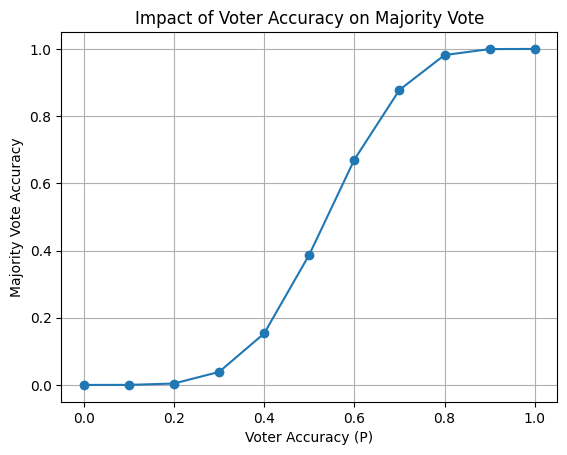

In [3]:
def correct_choise(P, num_voters):
    num_ones = 0
    num_zeros = 0
    x=np.random.choice([0,1],size=num_voters,p=[1-P,P])
    num_ones=np.sum(x==1)
    num_zeros=np.sum(x==0)
    num_one_win=0
    if num_ones>num_zeros:
        num_one_win+=1
    return num_one_win
P_values = np.arange(0, 1.1, 0.1)
accuracies = []
for P in P_values:
    total_accuracy = 0
    simulations = 10000 
    for _ in range(simulations):
        total_accuracy += correct_choise(P, 12) 
    average_accuracy = total_accuracy / simulations
    accuracies.append(average_accuracy)

plt.plot(P_values, accuracies, marker='o')
plt.xlabel('Voter Accuracy (P)')
plt.ylabel('Majority Vote Accuracy')
plt.title('Impact of Voter Accuracy on Majority Vote')
plt.grid(True)
plt.show()

# <span style="color:gold">Question 2 item C:</span>

Here we checked which modes of case A can be considered optimal
Obviously, to get optimal
The number of 1s must be more than 0s, otherwise the majority vote will never be 100%. The following function is an example to explain this story, otherwise, in general, it is the same as the explanation I gave.

In [5]:
def optimal(pv, num0, num1):
    for p in pv:
        if probability(num0, num1, p) == 1:  
            return p
    return None

Pv = np.arange(0.9, 1.0, 0.000000001)  
optimal_p =[ optimal(Pv, 5, 7) ,optimal(Pv, 2, 10) ,optimal(Pv, 3, 9) ,optimal(Pv, 7, 5)]

print(optimal_p)

[np.float64(0.999999991171807), np.float64(0.9903630384443587), np.float64(0.9978890222315093), None]


# <span style="color:gold">Question 2 item D:</span>

In this section, lists related to n, p entries are made
And then we initialize the two-dimensional representation of the heat map
Then with 1000 times of simulation using the available n,p
And we value our 2D heatmap presentation with the question function of item b
And finally we show the heat map

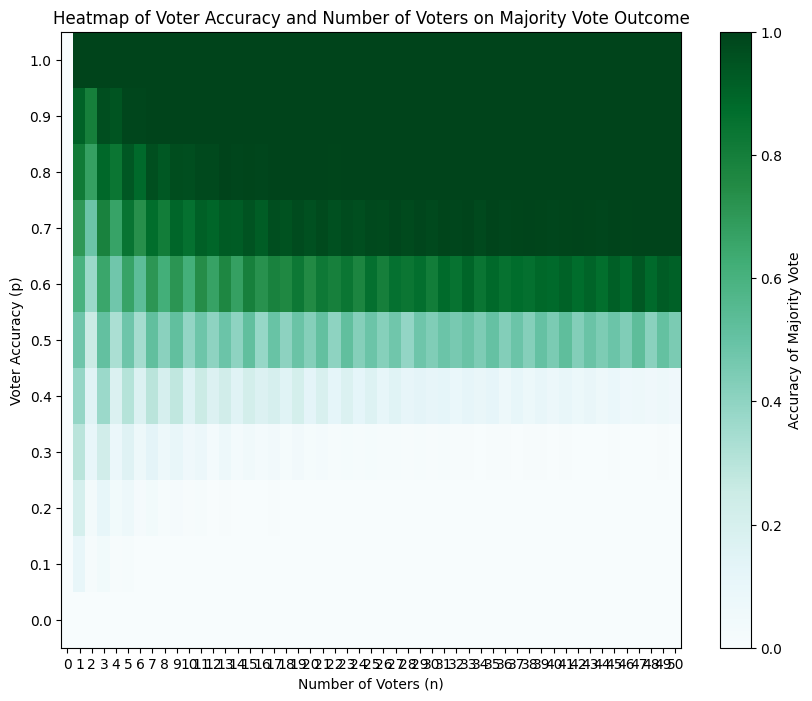

In [10]:

n_values = np.arange(0, 51, 1)
p_values = np.arange(0.0, 1.1, 0.1)

heatmap_data = np.zeros((len(p_values), len(n_values)))

for i, p in enumerate(p_values):
    for j, n in enumerate(n_values):
        total=0
        for _ in range(1000):
            total+=correct_choise(p, n)
        heatmap_data[i, j] = total/1000

plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', origin='lower', cmap='BuGn')
plt.colorbar(label='Accuracy of Majority Vote')
plt.xticks(ticks=np.arange(len(n_values)), labels=n_values)
plt.yticks(ticks=np.arange(len(p_values)), labels=np.round(p_values, 2))
plt.xlabel('Number of Voters (n)')
plt.ylabel('Voter Accuracy (p)')
plt.title('Heatmap of Voter Accuracy')
plt.show()